In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
pax_data = pd.read_csv('pax_data_363_agreements_11-04-20.csv')
pax_data.shape

(363, 78)

In [3]:
#types of data in the original dataset
pax_data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [4]:
#variables of type int
pax_data.describe(include=('int64'))

,PP,AgtId,Lgt,N_characters,WggPar,WggGenQuot,WggEffPart,WggCitizen,WggParOth,WggEq,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,77.030303,1044.336088,18.366391,35584.867769,0.415978,0.123967,0.305785,0.044077,0.090909,0.297521,...,0.099174,0.099174,0.096419,0.019284,0.011019,0.151515,0.090909,0.046832,0.033058,0.077135
std,44.807096,596.664460,35.373472,77000.143249,0.493570,0.329999,0.461375,0.205550,0.287877,0.457799,...,0.299307,0.299307,0.295572,0.137710,0.104537,0.359045,0.287877,0.211570,0.179034,0.267174
min,2.000000,2.000000,1.000000,750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,551.500000,3.000000,6801.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.000000,903.000000,7.000000,14629.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111.000000,1527.500000,15.000000,30391.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,158.000000,2247.000000,323.000000,908459.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#categorical variables description 
pax_data.describe(include='object')

,Con,Contp,PPName,Reg,Agt,Dat,Status,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO
count,363,363,363,363,363,363,363,363,363,358,358,212,216,358,21
unique,74,4,86,6,362,333,4,3,5,16,344,202,215,52,4
top,Colombia,Government,Colombia V - Santos,Africa (excl MENA),Statement of the State Commissions of Abkhazia...,1996-02-16,Multiparty signed/agreed,Intra,SubPar,MultIss,"EZLN, Mexican Government","William Clinton, U.S. President; Warren Christ...",- the relevant Resolution of the Conference on...,SSD,SDN
freq,24,182,19,164,2,5,341,284,137,73,5,4,2,27,10


In [6]:
new_data = pax_data.copy(deep=True)


## EDA of categories related to gender

According to dataset documentation, categories are measured by several variables. For instance, equality consists of WggEqGen and WggSocEq. Therefore, we created a new variables that aggregates all of these variables, where value of one means that at least one varibale of thata category is present

In [7]:
new_data['Equality'] = np.where((new_data['WggSocEq'] | new_data['WggEqGen'])==1, 1, 0)

In [8]:
#function for plot all variables of a category and the new variable
def plot_cat(cat_list):
    x_values = ['0', '1']
    fig, axs = plt.subplots(nrows=1, ncols=len(cat_list), figsize= (15,5))
    for i, name in enumerate(cat_list):
        axs[i].bar(x_values, new_data[name].value_counts())
        axs[i].set_title(name)



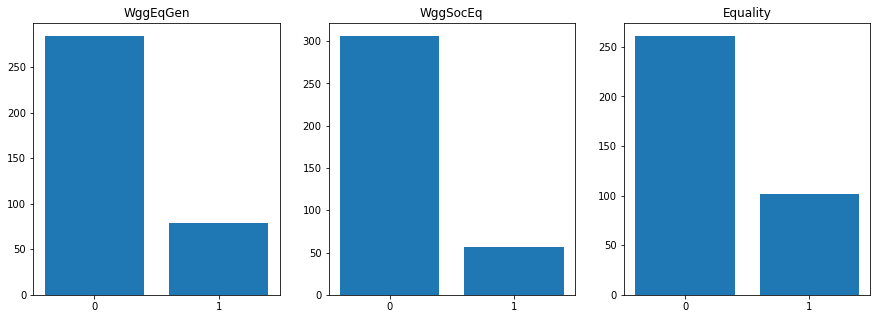

In [9]:
Equality_list = ['WggEqGen', 'WggSocEq', 'Equality']
plot_cat(Equality_list)

In [10]:
#new variable of participation
new_data['Participation'] = np.where((new_data['WggPar'] | new_data['WggGenQuot'] | new_data['WggEffPart'] | new_data['WggCitizen'] | new_data['WggParOth'])==1, 1, 0 )


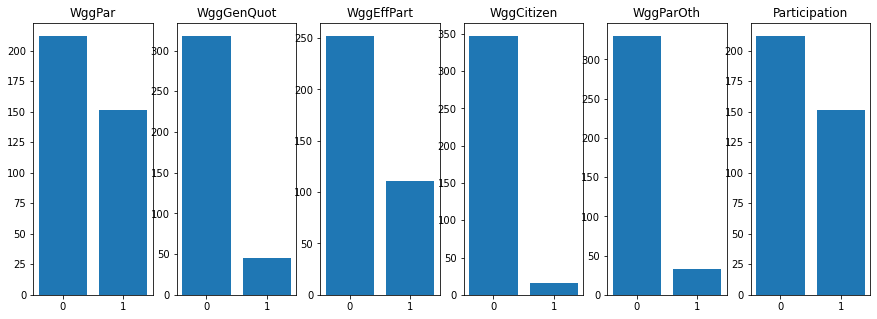

In [11]:
#comparison new variable with the rest of variables that belongs to that category
Participation_list = ['WggPar', 'WggGenQuot', 'WggEffPart', 'WggCitizen', 'WggParOth', 'Participation']
plot_cat(Participation_list)

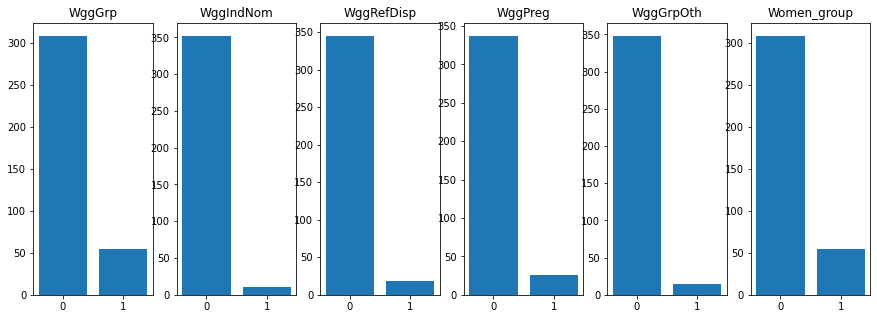

In [12]:
#new variable for data group
new_data['Women_group'] = np.where((new_data['WggGrp'] | new_data['WggIndNom'] | new_data['WggRefDisp'] | new_data['WggPreg'] | new_data['WggGrpOth'])==1, 1,0)
women_group_list = ['WggGrp', 'WggIndNom','WggRefDisp','WggPreg','WggGrpOth', 'Women_group']
plot_cat(women_group_list)

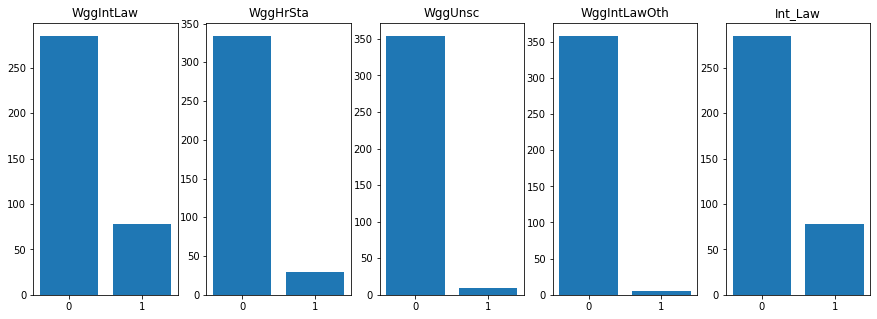

In [13]:
#new variable for 'Int_Law' 
new_data['Int_Law'] = np.where((new_data['WggIntLaw'] | new_data['WggHrSta'] | new_data['WggUnsc'] | new_data['WggIntLawOth'])==1, 1, 0)
int_law_list = ['WggIntLaw', 'WggHrSta', 'WggUnsc', 'WggIntLawOth', 'Int_Law']

plot_cat(int_law_list)

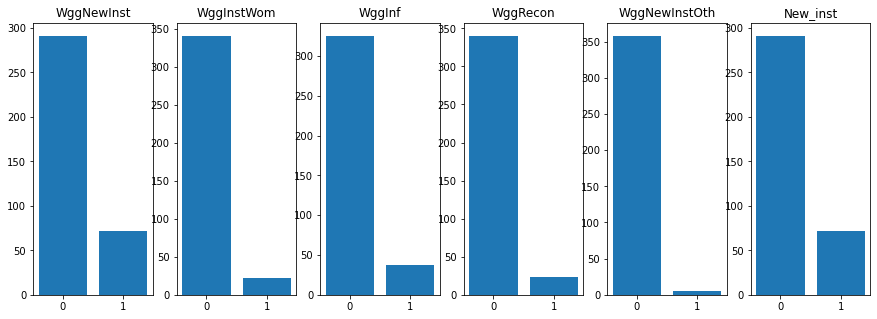

In [14]:
#new variable for new_inst_
new_data['New_inst'] = np.where((new_data['WggNewInst'] | new_data['WggInstWom'] | new_data['WggInf'] | new_data['WggRecon'] | new_data['WggNewInstOth'])==1, 1, 0) 
new_inst_list = ['WggNewInst', 'WggInstWom', 'WggInf', 'WggRecon', 'WggNewInstOth', 'New_inst']
plot_cat(new_inst_list)


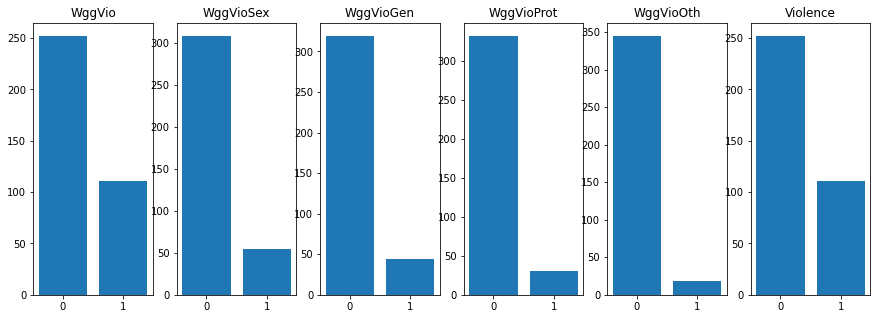

In [15]:
#new variable for violence
new_data['Violence'] = np.where((new_data['WggVio'] | new_data['WggVioSex'] | new_data['WggVioGen'] | new_data['WggVioProt'] | new_data['WggVioOth'])==1, 1, 0)
violence_list = ['WggVio', 'WggVioSex', 'WggVioGen', 'WggVioProt', 'WggVioOth', 'Violence']
plot_cat(violence_list)

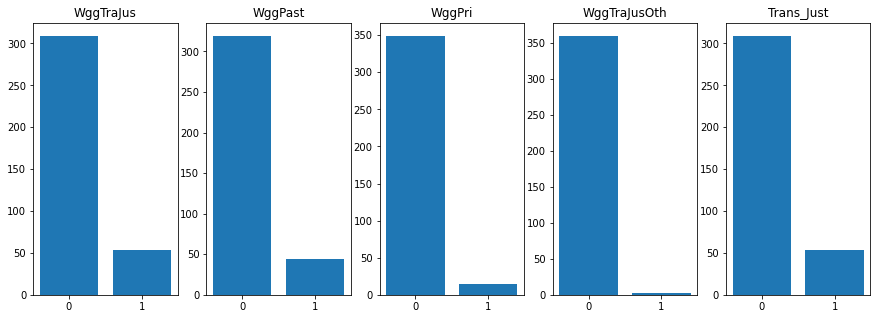

In [16]:
#new variable for Transitional Justice
new_data['Trans_Just'] = np.where((new_data['WggTraJus'] | new_data['WggPast'] | new_data['WggPri'] | new_data['WggTraJusOth'])==1, 1, 0)
trans_just_list = ['WggTraJus', 'WggPast', 'WggPri', 'WggTraJusOth', 'Trans_Just']
plot_cat(trans_just_list)

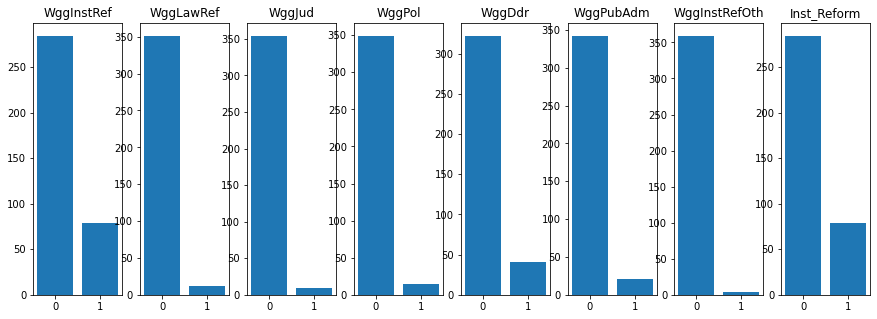

In [17]:
#new variable for inst_reform_list
new_data['Inst_Reform'] = np.where((new_data['WggInstRef'] | new_data['WggLawRef'] | new_data['WggJud'] | new_data['WggPol'] | new_data['WggDdr'] | new_data['WggPubAdm'] | new_data['WggInstRefOth'])==1, 1, 0)
inst_reform_list = ['WggInstRef', 'WggLawRef', 'WggJud', 'WggPol', 'WggDdr', 'WggPubAdm', 'WggInstRefOth', 'Inst_Reform']
plot_cat(inst_reform_list)

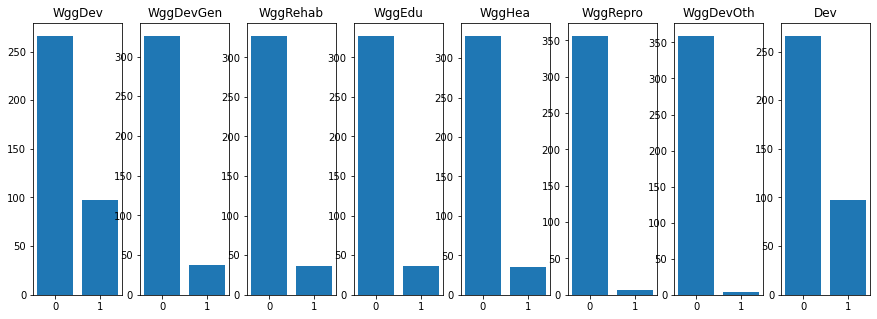

In [18]:
#new variable for Development
new_data['Dev'] = np.where((new_data['WggDev'] | new_data['WggDevGen'] | new_data['WggRehab'] | new_data['WggEdu'] | new_data['WggHea'] | new_data['WggRepro'] | new_data['WggDevOth'])==1, 1, 0)
dev_list= ['WggDev', 'WggDevGen', 'WggRehab', 'WggEdu', 'WggHea', 'WggRepro', 'WggDevOth', 'Dev']
plot_cat(dev_list)


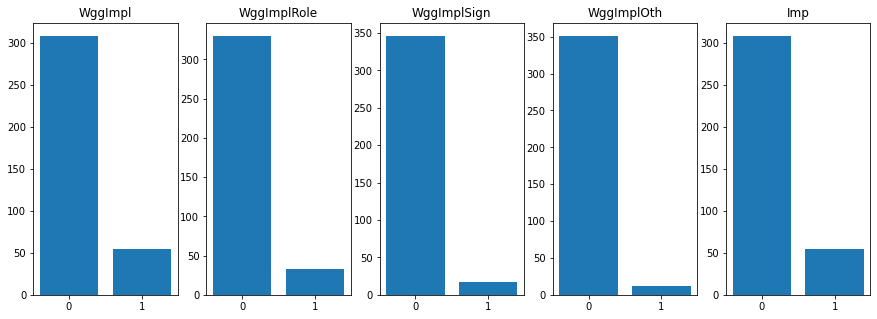

In [19]:
#new variable for imp_list
new_data['Imp'] = np.where((new_data['WggImpl'] | new_data['WggImplRole'] | new_data['WggImplSign'] | new_data['WggImplOth'])==1, 1, 0)
imp_list= ['WggImpl', 'WggImplRole', 'WggImplSign', 'WggImplOth', 'Imp']
plot_cat(imp_list)

In [20]:
#check data shape after adding variables
new_data.shape

(363, 88)

## NA values

In [21]:
#check na values
na_dict = { name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}
na_dict

{'StageSub': 5,
 'Part': 5,
 'ThrdPart': 151,
 'OthAgr': 147,
 'Loc1ISO': 5,
 'Loc2ISO': 342,
 'Loc1GWNO': 4,
 'Loc2GWNO': 342,
 'UcdpCon': 52,
 'UcdpAgr': 263,
 'PamAgr': 347,
 'CowWar': 149}

In [22]:
#variables with 60% of nan will be removed from the dataset
na_to_drop = {key: value for key, value in na_dict.items() if (value/len(pax_data)>0.60)}
na_to_drop
new_data = new_data.drop(columns = na_to_drop.keys())

In [23]:
na_to_drop

{'Loc2ISO': 342, 'Loc2GWNO': 342, 'UcdpAgr': 263, 'PamAgr': 347}

In [24]:
#Since Loc2ISO and Loc2GWNO was removed, the Loc1ISO and Loc1GWNO should be dropped too
new_data = new_data.drop(columns = ['Loc1ISO', 'Loc1GWNO'])
new_data.shape

(363, 82)

In [25]:
#check high correlation variables
pax_corr = new_data.corr()
upper = pax_corr.where(np.triu(np.ones(pax_corr.shape),k=1).astype(np.bool))

upper_cor = [column for column in upper.columns if (any(upper[column]>0.80))]
upper_cor


['N_characters',
 'WggEqGen',
 'WggHR',
 'WggPast',
 'Equality',
 'Participation',
 'Women_group',
 'Int_Law',
 'New_inst',
 'Violence',
 'Trans_Just',
 'Inst_Reform',
 'Dev',
 'Imp']

In [26]:
#check nan values after cleaning
{ name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}

{'StageSub': 5,
 'Part': 5,
 'ThrdPart': 151,
 'OthAgr': 147,
 'UcdpCon': 52,
 'CowWar': 149}

In [27]:
#UcdpCon and CowWar don't have enough data and are not valuable for this project 
new_data = new_data.drop(columns = ['UcdpCon', 'CowWar'])

#The rest of variables with NaN are filled with 'NA'
new_data = new_data.fillna(value = 'NA')

In [28]:
new_data.shape

(363, 80)

In [29]:
#check nan
{ name: new_data[name].isna().sum() for name in new_data.columns if new_data[name].isna().sum()!=0}

{}

## Removing variables not needed and data type transformation

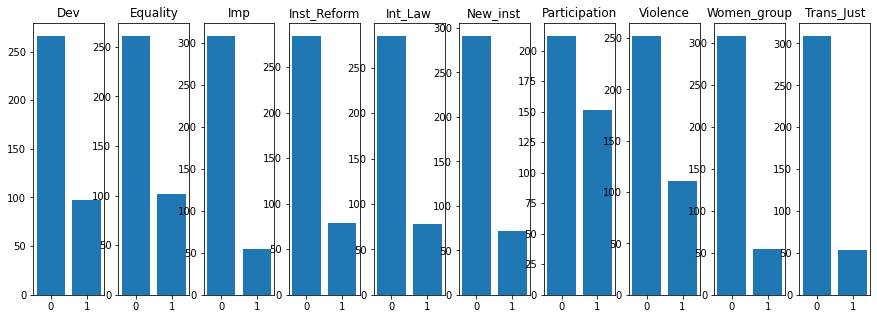

In [34]:
#visualise new variables created
new_var = ['Dev','Equality','Imp', 'Inst_Reform', 'Int_Law', 'New_inst', 'Participation', 'Violence', 'Women_group', 'Trans_Just']
plot_cat(new_var)

In [30]:
#change data type
new_data['PP'] = new_data['PP'].astype(object)
new_data['AgtId'] = new_data['AgtId'].astype(object)
new_data.dtypes
new_data.describe(include='int64').to_csv("new_data_obj_var.csv")

In [31]:
#drop variables not needed
del_var = ['Contp', 'Status', 'Agtp', 'Stage', 'StageSub', 'Part', 'ThrdPart', 'OthAgr', 'Lgt', 'N_characters']
new_data = new_data.drop(new_data[del_var], axis=1)

## Final dataset

In [32]:
#export final dataset
new_data.to_csv("pax_vis_pec3.csv")

In [36]:
new_data[new_var].dtypes

Dev              int64
Equality         int64
Imp              int64
Inst_Reform      int64
Int_Law          int64
New_inst         int64
Participation    int64
Violence         int64
Women_group      int64
Trans_Just       int64
dtype: object

<AxesSubplot:>

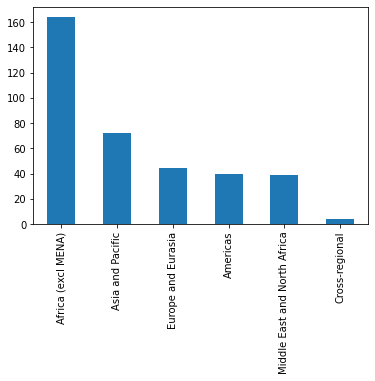

In [37]:
#plot dataset by region
new_data['Reg'].value_counts().plot(kind='bar')

<AxesSubplot:>

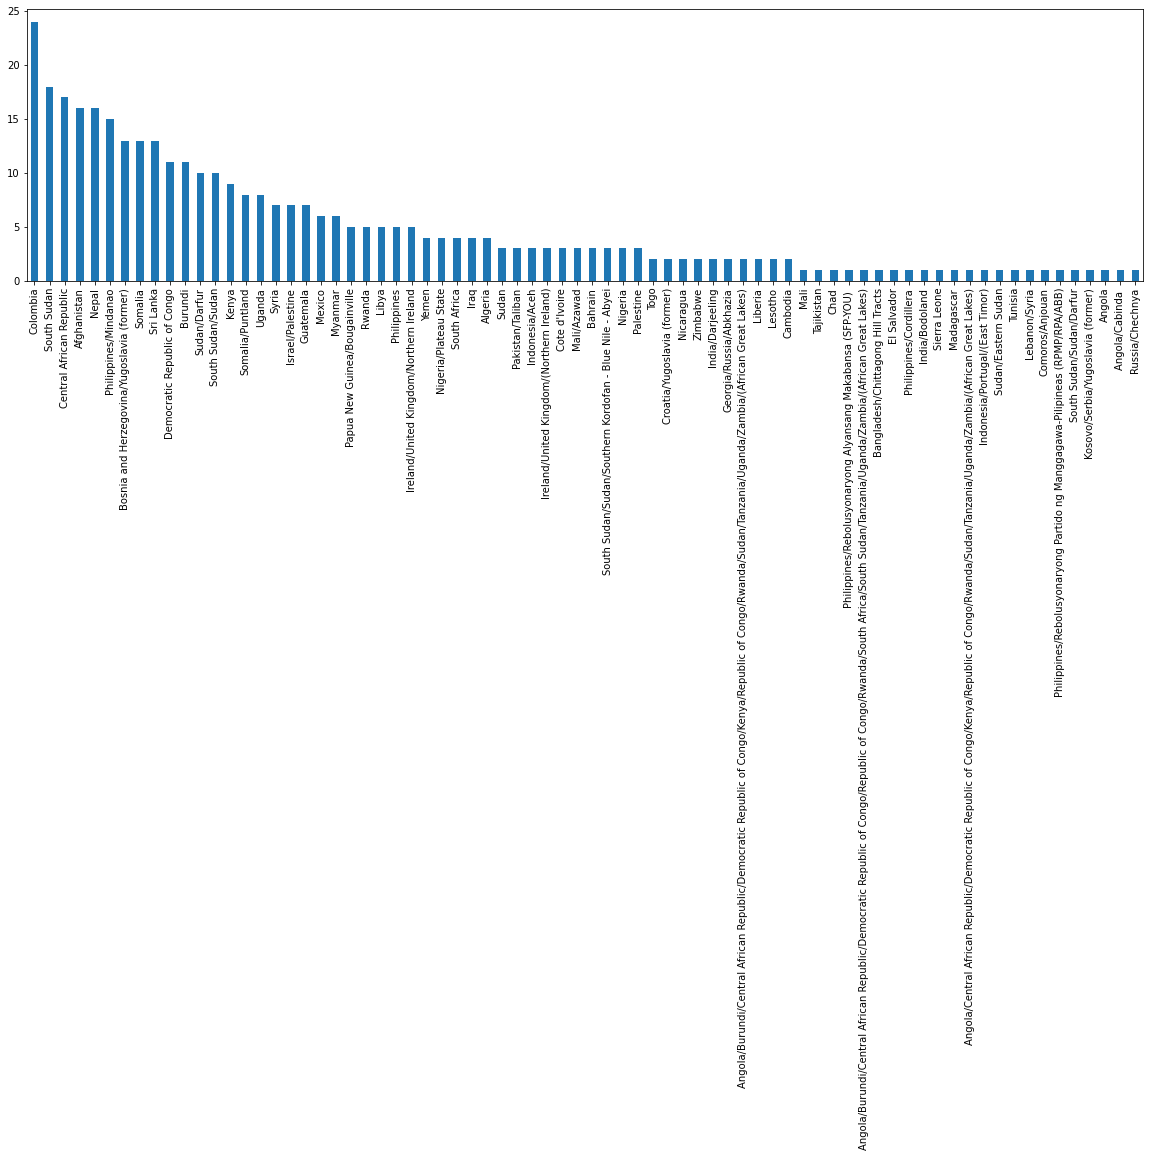

In [38]:
#plot by country
new_data['Con'].value_counts().plot(kind='bar', figsize =(20,5))